In [1]:
import numpy as np
import pandas as pd
pd.pandas.set_option('display.max_columns', None)

In [2]:
#importing dataset
dataset = pd.read_csv("fakenews_train.csv")

In [3]:
dataset.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [4]:
dataset.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [5]:
dataset = dataset.dropna()

In [6]:
dataset.shape

(18285, 5)

In [7]:
dataset.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [8]:
from sklearn.feature_extraction.text import CountVectorizer

In [9]:
df = dataset.copy()

In [10]:
df.reset_index(inplace = True)

In [11]:
df.head()

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [12]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
ps = PorterStemmer()
corpus = []
for i in range(0, len(df)):
    review = re.sub('[^a-zA-Z]', ' ', df['title'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

Removed all the punctuation marks, converted the reviews to lower case. Removed all the stopwords from all reviews and performed stemming. 

In [13]:
corpus

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag',
 'russian research discov secret nazi militari base treasur hunter arctic photo',
 'us offici see link trump russia',
 'ye paid govern troll social media blog forum websit',
 'major leagu soccer argentin find home success new york time',
 'well fargo chief abruptli step new york time',
 'anonym donor pay million releas everyon arrest dakota access pipelin',
 'fbi close hilla

In [14]:
len(corpus)

18285

converted all the reviews to vector form for training the model

In [15]:
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [16]:
X.shape

(18285, 5000)

In [17]:
y = df['label']

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test , y_train ,y_test = train_test_split(X , y ,test_size = 0.33 , random_state = 0)

In [19]:
count_df = pd.DataFrame(x_train, columns=cv.get_feature_names())

In [20]:
count_df.head()

abandon  abc  abc news  abduct  abe  abedin  abl  abort  abroad  absolut  \
0        0    0         0       0    0       0    0      0       0        0   
1        0    0         0       0    0       0    0      0       0        0   
2        0    0         0       0    0       0    0      0       0        0   
3        0    0         0       0    0       0    0      0       0        0   
4        0    0         0       0    0       0    0      0       0        1   

   abstain  absurd  abus  abus new  abus new york  academi  accept  access  \
0        0       0     0         0              0        0       0       0   
1        0       0     0         0              0        0       0       0   
2        0       0     0         0              0        0       0       0   
3        0       0     0         0              0        0       0       0   
4        0       0     0         0              0        0       0       0   

   access pipelin  access pipelin protest  accid  accident  accord  account  \
0               0                       0      0         0       0        0   
1               0                       0      0         0       0        0   
2               0                       0      0         0       0        0   
3               0                       0      0         0       0        0   
4               0                       0      0         0       0        0   

   accus  accus trump  achiev  acknowledg  acknowledg emf  \
0      0            0       0           0               0   
1      0            0       0           0               0   
2      0            0       0           0               0   
3      0            0       0           0               0   
4      0            0       0           0               0   

   acknowledg emf damag  aclu  acquit  acquitt  acr  across  act  act like  \
0                     0     0       0        0    0       0    0         0   
1                     0     0       0        0    0       0    0         0   
2                     0     0       0        0    0       0    0         0   
3                     0     0       0        0    0       0    0         0   
4                     0     0       0        0    0       0    0         0   

   act new  act new york  action  activ  activist  actor  actual  ad  adam  \
0        0             0       0      0         0      0       0   0     0   
1        0             0       0      0         0      0       0   0     0   
2        0             0       0      0         0      0       0   0     0   
3        0             0       0      0         0      0       0   0     0   
4        0             0       0      0         0      0       0   0     0   

   add  addict  address  adhd  admin  administr  admir  admit  adopt  adult  \
0    0       0        0     0      0          0      0      0      0      0   
1    0       0        0     0      0          0      0      0      0      0   
2    0       0        0     0      0          0      0      0      0      0   
3    0       0        0     0      0          0      0      0      0      0   
4    0       0        0     0      0          0      0      0      0      0   

   advanc  advertis  advic  advis  advis new  advis new york  advisor  advoc  \
0       0         0      0      0          0               0        0      0   
1       0         0      0      0          0               0        0      0   
2       0         0      0      0          0               0        0      0   
3       0         0      0      0          0               0        0      0   
4       0         0      0      0          0               0        0      0   

   affair  affect  affili  affirm  afford  afghan  afghanistan  africa  \
0       0       0       0       0       0       0            0       0   
1       0       0       0       0       0       0            0       0   
2       0       0       0       0       0       0            0       0   
3       0       0       0  

In [21]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()
classifier.fit(x_train, y_train)
pred = classifier.predict(x_test)

In [22]:
from sklearn import metrics
score = metrics.accuracy_score(y_test, pred)
print(score)
# we got accuracy score of 90.19 % which is very good score 

0.9019055509527755


In [23]:
import itertools

Confusion matrix, without normalization


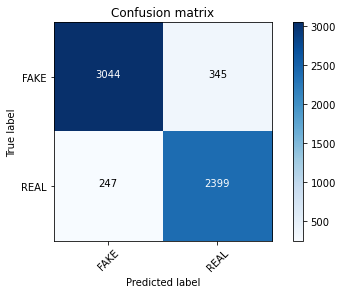

In [28]:
cm = metrics.confusion_matrix(y_test , pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [27]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [55]:
#hyperparameter tuning of alpha parameter in Multinomial classifier 

In [29]:
model = MultinomialNB(alpha = 0.1)
for i in np.arange(0 ,1,0.1):
    model = MultinomialNB(alpha = i)
    model.fit(x_train , y_train)
    y_pred = model.predict(x_test)
    score = metrics.accuracy_score(y_test, y_pred)
    print("Alpha: {}, Score : {}".format(i,score))
    

C:\Users\HP INDIA\anaconda3\lib\site-packages\sklearn\naive_bayes.py:508: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


Alpha: 0.0, Score : 0.8903065451532726
Alpha: 0.1, Score : 0.9020712510356255
Alpha: 0.2, Score : 0.9025683512841757
Alpha: 0.30000000000000004, Score : 0.9024026512013256
Alpha: 0.4, Score : 0.9017398508699255
Alpha: 0.5, Score : 0.9015741507870754
Alpha: 0.6000000000000001, Score : 0.9022369511184756
Alpha: 0.7000000000000001, Score : 0.9025683512841757
Alpha: 0.8, Score : 0.9015741507870754
Alpha: 0.9, Score : 0.9017398508699255
